*Waheeb Algabri*

# **Data Visualization using Matplotlib and Seaborn:**

This notebook is dedicated to generating data visualizations for a given dataset by utilizing Python libraries such as Matplotlib and Seaborn. The approach involves initially creating visualizations using Matplotlib, followed by an attempt to reproduce the same visualizations using Seaborn. Subsequently, a comparative analysis will be conducted to elucidate the distinctions between these two libraries. However, prior to delving into this comparative analysis, let us commence by discussing the characteristics of the dataset with which we will be working.

## **About the Dataset:**

The dataset was sourced from kaggle.com and subsequently hosted on GitHub, from which it has been imported into this notebook. This dataset comprises data pertaining to the Gross Domestic Products (GDPs) of various countries and economies. Furthermore, it encompasses data related to various sectors, including industry, agriculture, and services, along with their respective contributions to the overall GDP expressed in terms of percentages.

While this dataset offers valuable material for visualization practice, it necessitates a preliminary data cleaning process due to the presence of missing data and a requirement for column name adjustments. To commence our work on this dataset, it is imperative that we establish the necessary environment by importing the essential modules.

In [11]:
# Acquiring the libraries needed
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Loading & displaying the data frame:**

Let's load the dataframe from our Github repo into notebook. We will use `read_csv()` function from pandas. After loading the data frame we can use `.head()` method to display the first five rows of the data frame to see if everything loaded correctly.

In [12]:

df = pd.read_csv("https://raw.githubusercontent.com/waheeb123/Datasets/main/GDPs%20of%20different%20countries/economies.csv")

In [13]:
df.head()

,Index Number,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Unnamed: 5,Unnamed: 6,Industry,Unnamed: 8,Unnamed: 9,Services,Unnamed: 11,Unnamed: 12,Year GDP,Year Sector
0,NaN,NaN,NaN,NaN,GDP,Rank,% of GDP,GDP,Rank,% of GDP,GDP,Rank,% of GDP,NaN,NaN
1,0.0,1,United States,19360000,174240,3,0.9,3659040,2,18.9,15526720,1,80.2,2017,2017
2,1.0,2,China,11940000,991020,1,8.3,4716300,1,39.5,6232680,2,52.2,2017,2017
3,2.0,3,Japan,4884000,48840,13,1,1450548,3,29.7,3384612,3,69.3,2017,2017
4,3.0,4,Germany,3652000,21912,31,0.6,1099252,4,30.1,2530836,4,69.3,2016,2017


## **Cleaning the data frame:**
After displaying the data frame its time to prepare the data frame for the visualization and the first thing that we see is the names of the columns. So without any further due lets fix that first.

In [14]:
# Displaying the column names
df.keys()

Index(['Index Number ', 'Rank', 'Country/Economy', 'GDP (millions of $)',
       'Agriculture GDP', 'Unnamed: 5', 'Unnamed: 6', 'Industry', 'Unnamed: 8',
       'Unnamed: 9', 'Services', 'Unnamed: 11', 'Unnamed: 12', 'Year GDP ',
       'Year Sector'],
      dtype='object')

In [15]:
# Changing names of the columns
df = df.rename(columns={'Unnamed: 5': 'Agriculture Rank', 'Unnamed: 6': 'Agriculture % of GDP', 'Industry': 'Industry GDP',
          'Unnamed: 8': 'Industry Rank','Unnamed: 9' : 'Industry % of GDP', 'Services': 'Services GDP',
          'Unnamed: 11': 'Services Rank', 'Unnamed: 12': 'Services % of GDP'})

After fixing the names of the column lets checkout the type of data each column has. We will use the `.dtypes` method.

In [16]:
df.dtypes

Index Number            float64
Rank                     object
Country/Economy          object
GDP (millions of $)      object
Agriculture GDP          object
Agriculture Rank         object
Agriculture % of GDP     object
Industry GDP             object
Industry Rank            object
Industry % of GDP        object
Services GDP             object
Services Rank            object
Services % of GDP        object
Year GDP                 object
Year Sector              object
dtype: object

As we can see that the data type is an object meaning that we need to change that. Alongside that the missing values are represent as "-" rather than NaN so let's change that too.

In [17]:
# Fixing NA's
df= df.replace('-',np.NaN)
df = df.replace('FY12/13', 2012)

In [18]:
# Removing first row
df = df.drop(index=0)

In [19]:
# Changing the data type for columns
c_list = ['Rank','GDP (millions of $)', 'Agriculture GDP', 'Agriculture Rank', 'Agriculture % of GDP',
'Industry GDP', 'Industry Rank', 'Industry % of GDP','Services % of GDP', 'Services GDP','Services Rank','Year GDP ','Year Sector']
for x in c_list:
    print(x)
    df[x] = pd.to_numeric(df[x])

Rank
GDP (millions of $)
Agriculture GDP
Agriculture Rank
Agriculture % of GDP
Industry GDP
Industry Rank
Industry % of GDP
Services % of GDP
Services GDP
Services Rank
Year GDP 
Year Sector


In [20]:
# Making list of column that has missing values
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

In [21]:
# displaying the column names and number of missing values
for i in cols_with_missing:
    print(i,df[i].isnull().sum())

Rank 6
GDP (millions of $) 6
Agriculture GDP 12
Agriculture Rank 12
Agriculture % of GDP 6
Industry GDP 10
Industry Rank 10
Industry % of GDP 7
Services GDP 9
Services Rank 9
Services % of GDP 6
Year GDP  6
Year Sector 5


In [22]:
# Getting rid of missing values
df= df.dropna()

# **Visualization:**

Now ou data frame is clean and ready to perform some exploratory data analysis using meaningful visuals. I will using both matplotlib and seaborn, first I will try plot two variable using matplotlib and will try to replicate the same graph using seaborn after that we will comment on how both methods were similar or different. Along the way we will also try point out key findings from the graph to carry on with analysis.

We will start by reducing our data frame to top 20 countries who did very in the year 2017. So we will the data where `Year GDP` is 2017 and sort the values based on `GDP (millions of $)` and reduce the data frame top 20 by `.head()` method.

In [23]:
top_20 = df[df['Year GDP ']==2017].sort_values(by='GDP (millions of $)', ascending=False).head(20)

## **Creating a barplot:**
### **Matplotlib:**

Let's plot the countries/ economies against GDP using matplotlib first.

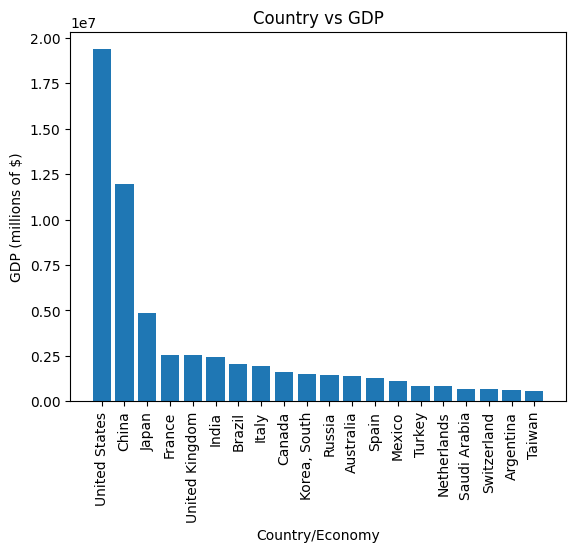

In [24]:
plt.bar(top_20['Country/Economy'], top_20['GDP (millions of $)'])
plt.xticks(rotation=90)
plt.xlabel("Country/Economy")
plt.ylabel("GDP (millions of $)")
plt.title("Country vs GDP")
plt.show()

### **Seaborn:**

Let's try to replicate the same graph using seaborn.

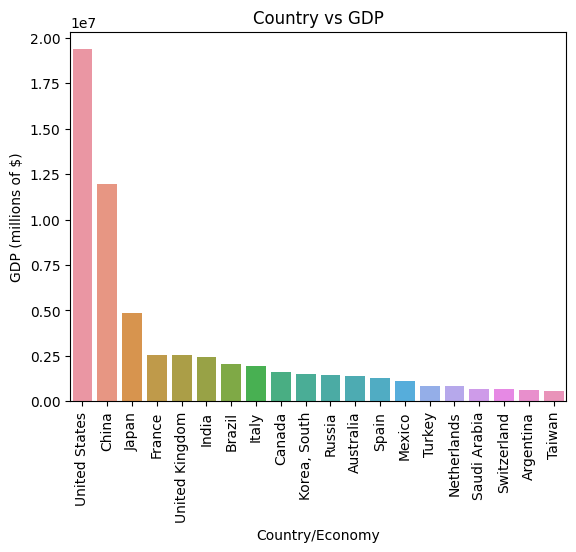

In [25]:
sns.barplot(data=top_20, x='Country/Economy', y="GDP (millions of $)")
plt.xticks(rotation = 90)
plt.title("Country vs GDP")
plt.show()

### **Comment:**

We can see that in order to plot a graph like above using matplotlib we would need define things like labels and different coloring for different bars on the plot while in Seaborn it automatically picks that from the variable (column names) that we are plotting and also assign colors to different bars on the graph that displays different information.

### **Key Finding(s):**
The graph clearly depicts that United States out perform every other country in the year 2017 when it comes to GDP growth followed by China and Japan.

## **Creating a Subplot:**

The above was good enough to point out how each country/economy performed in 2017 but it still lacks a lot of information. For instance, our data frame contains data about the sectors like industry, agriculture and services and their contribution towards overall GDP so let's create a subplot so that we can see how each country is doing in each sector:

### **Matplotlib:**
Let's use matplotlib to create the subplot between different sectors:

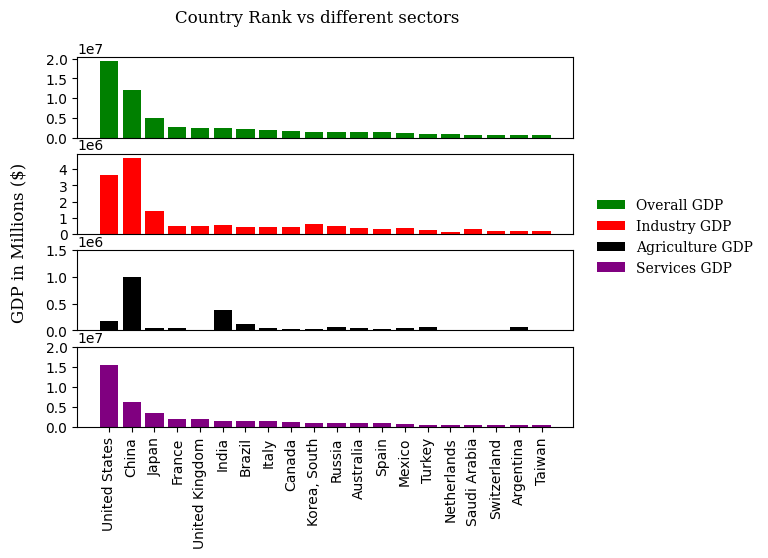

In [26]:
# subplot initiation
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)


# Title for subplots
fig.suptitle('Country Rank vs different sectors', fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Creating the sub-plots.
l1 = ax1.bar(top_20['Country/Economy'],top_20['GDP (millions of $)'], linestyle='dotted',color='green', label='Overall GDP')
l2 = ax2.bar(top_20['Country/Economy'],top_20['Industry GDP'],color='red',label="Industry GDP")
l3= ax3.bar(top_20['Country/Economy'],top_20['Agriculture GDP'],color='black',label="Agriculture GDP")
l4= ax4.bar(top_20['Country/Economy'],top_20['Services GDP'],color='purple',label="Services GDP")

# Setting the Ticks for plot
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
plt.xticks(rotation=90)
ax1.set_yticks(np.arange(0,25000000,5000000))
ax2.set_yticks(np.arange(0,4500000,1000000))
ax3.set_yticks(np.arange(0,2000000,500000))
ax4.set_yticks(np.arange(0,25000000,5000000))

#Setting the labels
fig.supylabel('GDP in Millions ($) ', fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Setting/formatting the legends
fig.legend(bbox_to_anchor=(1.2,.4),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)


#Displaying the plot
plt.show()


### **Seaborn:**

Let's recreate the same plot using Seaborn.

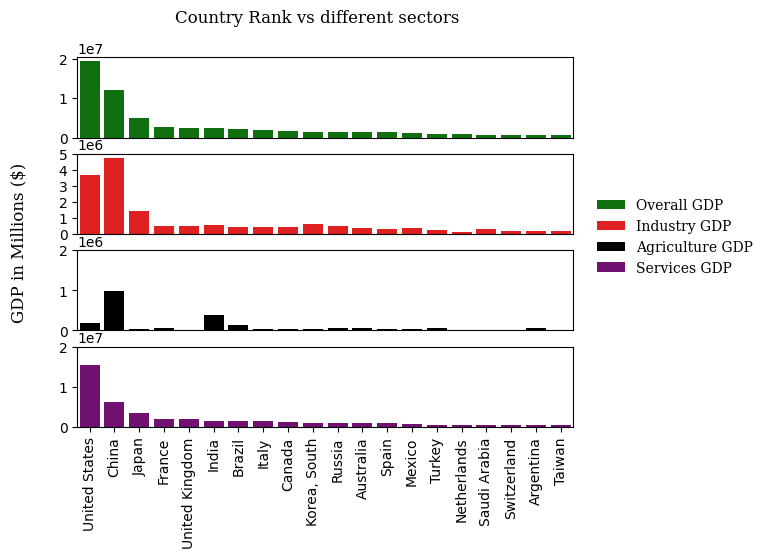

In [27]:
fig, axes = plt.subplots(4, 1)

# Setting the title of plot
fig.suptitle('Country Rank vs different sectors', fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Plotting using seaborn
x1=sns.barplot(ax=axes[0], data = top_20 ,x='Country/Economy', y='GDP (millions of $)', color='green',label='Overall GDP')
x2=sns.barplot(ax=axes[1],data = top_20 ,x='Country/Economy',y='Industry GDP',color='red',label="Industry GDP")
x3=sns.barplot(ax=axes[2],data = top_20 ,x='Country/Economy',y='Agriculture GDP',color='black',label="Agriculture GDP")
x4=sns.barplot(ax=axes[3],data = top_20 ,x='Country/Economy',y='Services GDP',color='purple',label="Services GDP")

# Setting the ticks
x1.set_xticks([])
x2.set_xticks([])
x3.set_xticks([])
x1.set_yticks(np.arange(0,25000000,10000000))
x2.set_yticks(np.arange(0,5500000,1000000))
x3.set_yticks(np.arange(0,2500000,1000000))
x4.set_yticks(np.arange(0,25000000,10000000))
plt.xticks(rotation=90)

# Fixing the labels
x1.set(xlabel=None, ylabel=None)
x2.set(xlabel=None, ylabel=None)
x3.set(xlabel=None, ylabel=None)
x4.set(xlabel=None, ylabel=None)
fig.supylabel('GDP in Millions ($) ', fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Setting/formatting the legends
fig.legend(bbox_to_anchor=(1.2,.4),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)

#Displaying the plot
plt.show()

### **Comment:**

In the subplot above We can see that we realtively required more code when it comes to Seaborn, since Seaborn auto picks the label and color so in order to replicate the same graph that we created through Matplotlib we would need to set the labels to none and properly define colors. Since seaborn is build on top of Matplotlib so in order to do a lot customization Matplotlib is superior to Seaborn and is rightly proved by the graphs above. Another thing that i wanted to add was that by default the x-axis ticks are very close to y-axis in Seaborn as compared to Matplotlib.


### **Key Finding(s):**

An interesting find from the subplot is that even though United States was outperforming all other countries when it comes to GDP but if we break down by sectors China was the number 1 in Industry and Agriculture while United states was the number 1 in service sector.

## **Creating a Line Plot:**

Well honestly this plot will not add anything to the analysis part but I just wanted to try a different type of plot.

### **Matplotlib:**

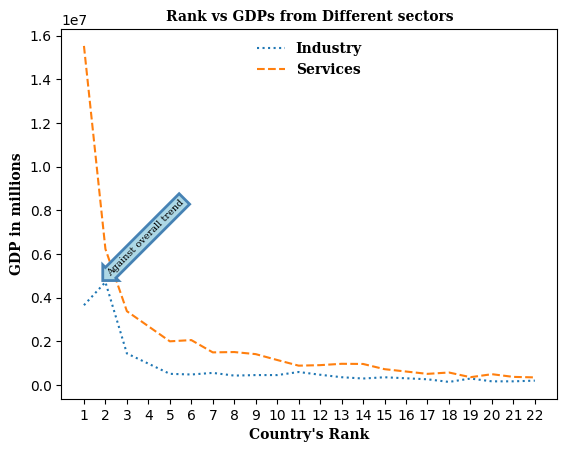

In [28]:
# Plotting
plt.plot(top_20['Rank'], top_20['Industry GDP'], label='Industry',linestyle='dotted')
plt.plot(top_20['Rank'], top_20['Services GDP'], label='Services',linestyle='dashed')

# Setting the legends
plt.legend(loc='upper center',prop={'weight':'bold', 'size':10,'family':'serif'}, frameon=False)

# Defining the labels
plt.xlabel("Country's Rank", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.ylabel("GDP in millions", fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Fixing the ticks
plt.xticks(np.arange(1,23,1))

# Defining the title
plt.title("Rank vs GDPs from Different sectors", fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Annotate
plt.text(2,5000000, 'Against overall trend',fontdict={ 'size':10,'family':'serif'}, rotation=45, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))

# Displaying the graph
plt.show()

### **Seaborn:**

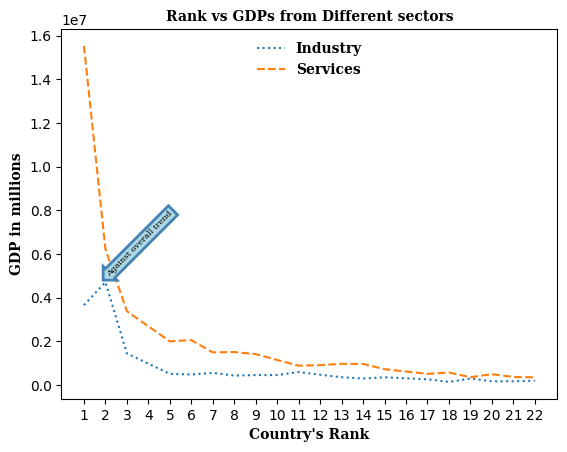

In [29]:
# Plotting
sns.lineplot(data=top_20, x='Rank', y='Industry GDP', label='Industry',linestyle='dotted')
sns.lineplot(data=top_20,x='Rank', y='Services GDP', label='Services',linestyle='dashed')

# Setting the legends
plt.legend(loc='upper center',prop={'weight':'bold', 'size':10,'family':'serif'}, frameon=False)

# Defining the labels
plt.xlabel("Country's Rank", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.ylabel("GDP in millions", fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Fixing the ticks
plt.xticks(np.arange(1,23,1))

# Defining the title
plt.title("Rank vs GDPs from Different sectors", fontdict={'weight':'bold', 'size':10,'family':'serif'})

# Annotate
plt.text(2,5000000, 'Against overall trend',fontdict={ 'size':10,'family':'serif'}, rotation=45, size=6,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))

# Displaying the graph
plt.show()


### **Comment**:

Similar difference can seen over here as is for the bar graph. Apart from difference both libraries are very easy to work with and are capable to produce high quality visuals.

### **Another style of subplot:**


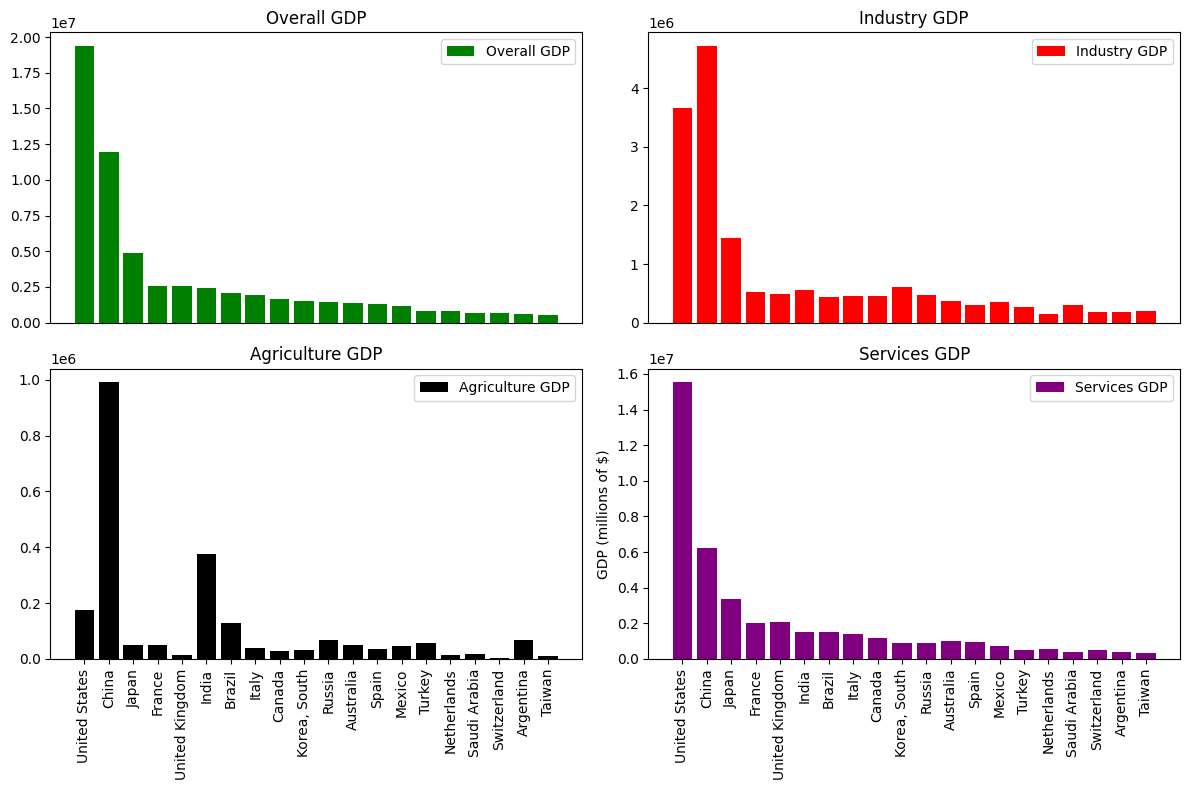

In [32]:
# Create a figure with 2x2 subplots
plt.figure(figsize=(12, 8))

# Subplot 1: Overall GDP
plt.subplot(2, 2, 1)
a = plt.bar(top_20['Country/Economy'], top_20['GDP (millions of $)'], color='green')
plt.xticks([])
plt.title('Overall GDP')
plt.legend(labels=['Overall GDP'])

# Subplot 2: Industry GDP
plt.subplot(2, 2, 2)
b = plt.bar(top_20['Country/Economy'], top_20['Industry GDP'], color='red')
plt.xticks([])
plt.title('Industry GDP')
plt.legend(labels=['Industry GDP'])

# Subplot 3: Agriculture GDP
plt.subplot(2, 2, 3)
c = plt.bar(top_20['Country/Economy'], top_20['Agriculture GDP'], color='black')
plt.xticks(rotation=90)
plt.title('Agriculture GDP')
plt.legend(labels=['Agriculture GDP'])

# Subplot 4: Services GDP
plt.subplot(2, 2, 4)
d = plt.bar(top_20['Country/Economy'], top_20['Services GDP'], color='purple')
plt.xticks(rotation=90)
plt.title('Services GDP')
plt.legend(labels=['Services GDP'])

# Add a common y-axis label
plt.ylabel('GDP (millions of $)')

# Display the plot
plt.tight_layout()
plt.show()
